number of students with extra credit: 503
mean: 0.7976540755467197
min: 0.1
max: 5.0
number <= 1: 372
Correlation Coefficient:           Extra     Total
Extra  1.000000  0.187061
Total  0.187061  1.000000
RMSE: 10.711492451359439


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


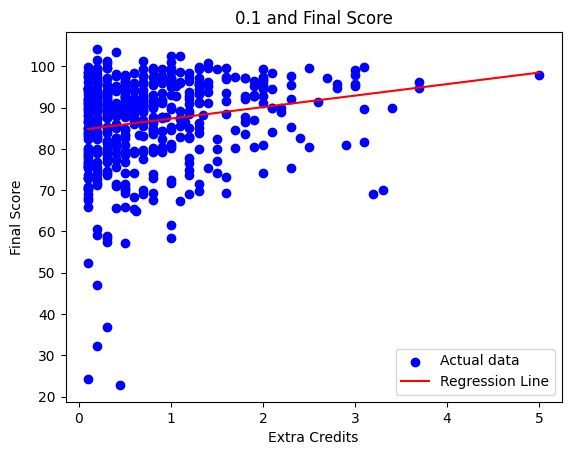

In [4]:
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import os

import matplotlib as mpl
import matplotlib.pyplot as plt


# put data into DataFrame
data = pd.read_excel('/content/extra_credits_dataset.xlsx', sheet_name = 'Sheet1')

#Q1
#how many students got bonus points

student_bonus_count = data['Extra'].notnull().sum()
print(f"number of students with extra credit: {student_bonus_count}")

#Q2
#mean, min, max
mean = data['Extra'].mean()
print(f"mean: {mean}")

min = data['Extra'].min()
print(f"min: {min}")

max = data['Extra'].max()
print(f"max: {max}")

#Q3
# % of students with <1 point
count = (data['Extra']<= 1).sum()
print(f"number <= 1: {count}")

#Q4
#correlation coefficient
correlation_matrix = data.corr()
print(f"Correlation Coefficient: {correlation_matrix}")

#Q5
#Scatter plot
data.plot(kind = "scatter", x = "Extra", y = "Total")

#Q6


clean_data = data.dropna(subset=["Extra"])
labels = clean_data[["Extra"]]
predictions = clean_data['Total']
lin_reg = LinearRegression()
lin_reg.fit(labels, predictions)

#Q7
#RMSE


extra_credit_predictions = lin_reg.predict(labels)
mse = mean_squared_error(predictions, extra_credit_predictions)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
#Q8
#plot

extra_range = np.linspace(labels['Extra'].min(), labels['Extra'].max(), 100).reshape(-1,1)
predicted_scores = lin_reg.predict(extra_range)

plt.scatter(clean_data['Extra'],clean_data['Total'],color = 'blue', label = 'Actual data')

plt.plot(extra_range, predicted_scores, color = 'red', label = 'Regression Line')

plt.title('0.1 and Final Score')
plt.xlabel('Extra Credits')
plt.ylabel('Final Score')
plt.legend()

plt.show()


